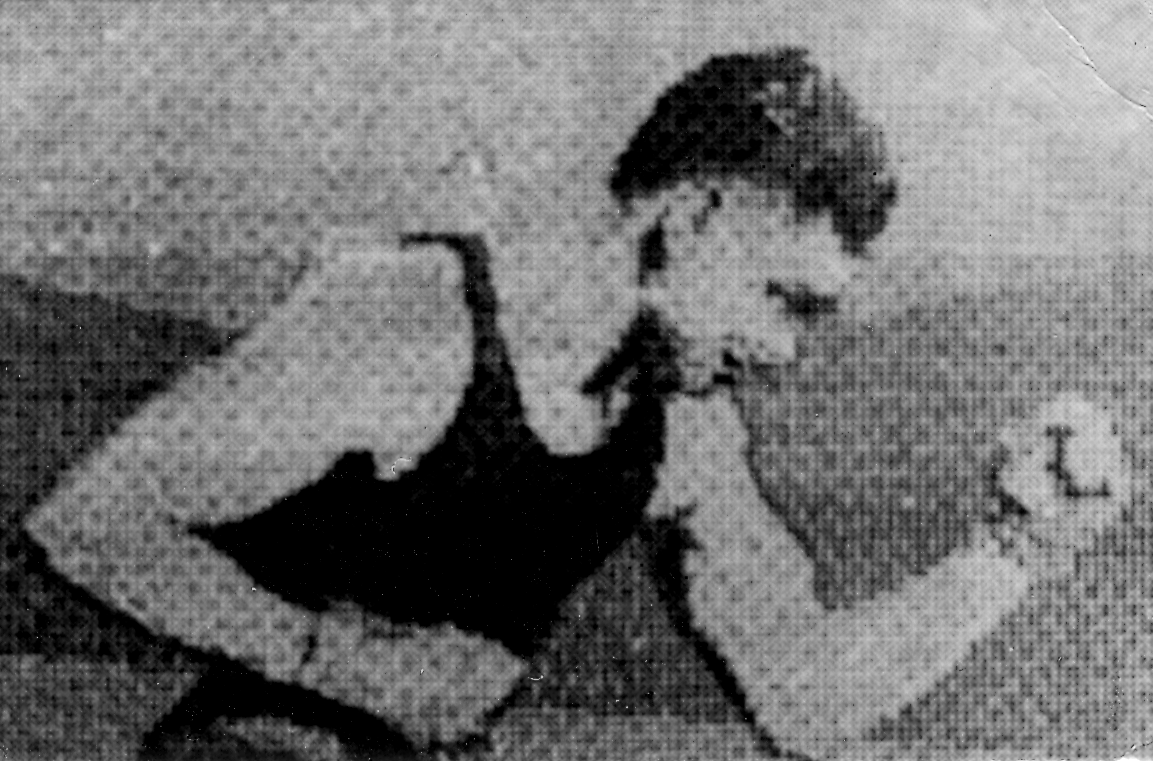

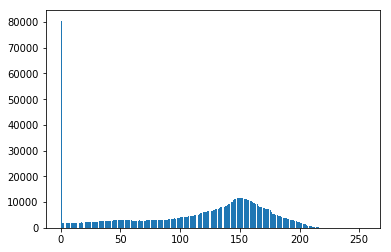

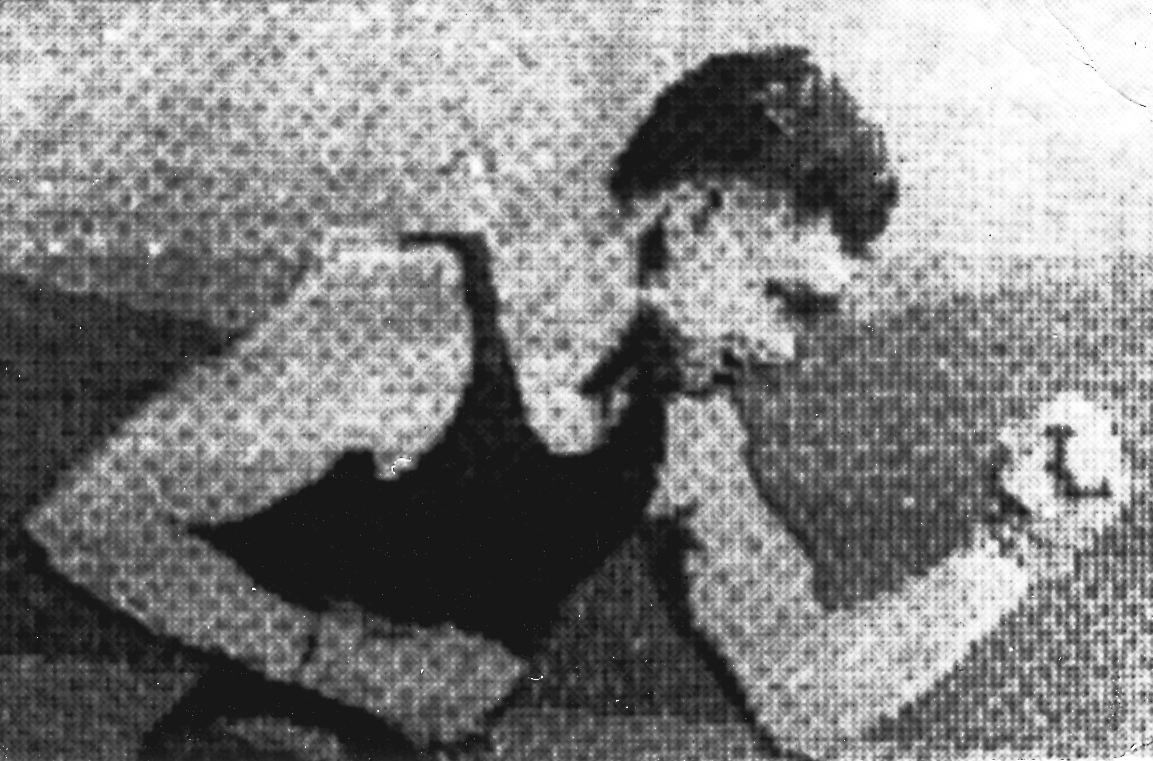

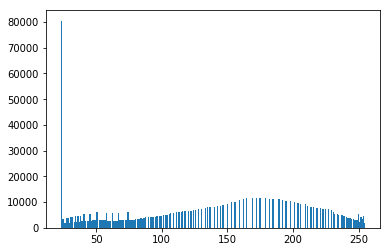

In [2]:
#Program for image enhancement using histogram equalization

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equilization(img):
    #read image and convert to 2D array
    with Image.open(img) as img:
        img_size = img.size
        img_arr = np.array(img, dtype=np.uint8)
        display(img)
        img.show()

    plt.hist(img_arr.flatten(), bins = 256) #histogram before equalization
    plt.show()
    #initialise array with size 256 to 0
    arr = np.zeros(256)

    #count number of pixels in each intensity i.e. nk
    for i in range(img_size[1]):
        for j in range(img_size[0]):
            arr[img_arr[i][j]] = arr[img_arr[i][j]]+1

    #find probabilities of pixels in each intensity i.e. nk/(M*N)
    arr = arr/(img_size[1]*img_size[0])

    #find cumilative values i.e. Cm
    for i in range(1,256):
        arr[i] = arr[i-1]+arr[i]

    #multiply by highest intensity i.e. 255 and round off values
    arr = np.round(arr*255)

    result = np.zeros((img_size[1],img_size[0]), dtype=np.uint8)
    #assign equilized intensities to image and save
    for i in range(img_size[1]):
        for j in range(img_size[0]):
            result[i][j] = arr[img_arr[i][j]]

    result_img = Image.fromarray(result)
    result_img.save('histogram.tif')
    
    result_img.show()
    display(result_img)
    plt.hist(result.flatten(), bins = 256) #histogram after equalization
    plt.show()


histogram_equilization('Fig0101(1921 digital image).tif')